# 14: Quantum tunnelling

In [1]:
from renom_q import *
import math

Quantum tunneling effect is a quantum mechanical phenomenon in which particles pass through a potential barrier as if they pass through a tunnel.  
The state of the quantum tunnel experiment can be simulated with the quantum gate, and it can be seen that the existence probability of quantum moves through the potential barrier of energy.

The Schrodinger equation of a single electron that can move in a one-dimensional space with a rectangular well-type potential can be expressed as follows.  
$H$ is the Hamiltonian and is the energy of the entire system and is the sum of the kinetic energy $K$ and the potential energy $V$ of the potential barrier.

$$i \hbar \frac{\partial}{\partial t}\left| \psi \right\rangle = H \left| \psi \right\rangle = (K + V) \left| \psi \right\rangle$$

For simplicity we assume $\hbar=1$. Solving the Schrödinger equation when the state vector depends on time and Hamiltonian is not time dependent is,

\begin{eqnarray}
\int^t_0{\frac{d\left| \psi(t) \right\rangle}{\left| \psi(t) \right\rangle}}&=&\int^t_0{-iHdt} \\
\log{\frac{\left| \psi(t) \right\rangle}{\left| \psi(0) \right\rangle}}&=&-iHt \\
\left| \psi(t) \right\rangle&=&e^{-iHt}\left| \psi(0) \right\rangle \\
\end{eqnarray}

Therefore, the Schrodinger equation develops time from the initial state $\left| \psi(0) \right\rangle$ to the final state $\left| \psi(t) \right\rangle$ by undergoing the following unitary transformation.

$$U(t)=e^{\displaystyle -iHt} =e^{\displaystyle -i(K + V)t}$$

Approximate this equation by Suzuki trotter decomposition.

$$U(t)=e^{\displaystyle -i(K + V)t} \approx \left( e^{\displaystyle -iK\Delta t} \cdot e^{\displaystyle -iV\Delta t} \right)^{\frac{t}{\Delta t}}$$

Then, it can be separated into unitary transformation $e^{-iK\Delta t}$ of kinetic energy $K$ and unitary transformation $e^{-iV\Delta t}$ of potential energy $V$. The unitary transformation $e^{-iK\Delta t}$ of the kinetic energy k in the simulation with 2 qubits can be expressed using the Fourier transform $F$.

$$e^{\displaystyle -iK\Delta t} = FDF^{\dagger} = F \left( e^{\displaystyle -iT\Delta t} \right) F^{\dagger}$$

$$D = e^{\displaystyle -iT\Delta t} = e^{\displaystyle -i\frac{\pi^2}{4}
\begin{bmatrix}
0 & 0 & 0 & 0 \\
0 & 4 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 
\end{bmatrix}
\Delta t} $$

$T$ is a diagonal matrix whose diagonal component is $k^2/2m$ ($k$ is the wave number of Fourier mode). Further, $D$ can be implemented by combining the unitary rotation gate $U_1$ and the control phase rotation gate $cU_1$ which is an existing quantum gate of the quantum computer.

\begin{eqnarray} 
&& cU_1(\pi^2 \Delta t) \left( U_1 \left( -\frac{\pi^2}{4}\Delta t \right) \otimes I \right) \left( I \otimes U_1 \left( -\pi^2 \Delta t \right) \right) \nonumber \\
&&= e^{\displaystyle -i\frac{\pi^2}{2}
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & -1 
\end{bmatrix}
\Delta t} \cdot
e^{\displaystyle i\frac{\pi^2}{8}
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & -1 & 0 \\
0 & 0 & 0 & -1 
\end{bmatrix}
\Delta t} \cdot
e^{\displaystyle i\frac{\pi^2}{2}
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & -1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & -1 
\end{bmatrix}
\Delta t}  \nonumber \\
&&= e^{\displaystyle -i\frac{\pi^2}{4}
\begin{bmatrix}
0 & 0 & 0 & 0 \\
0 & 4 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 
\end{bmatrix}
\Delta t} 
\end{eqnarray}

Also, the unitary transformation $e^{-iV\Delta t}$ of the potential energy $V$ can be expressed as follows using the barrier height parameter $v$ and the phase inversion operator $Z$.

$$e^{\displaystyle -iV\Delta t} = e^{\displaystyle -ivZ\Delta t} $$

Therefore, assuming that the parameter $v$ of the height of the barrier is 10, the quantum bit to which the unitary transformation $e^{-iV\Delta t}$ is applied becomes a potential barrier in the state $\left| 0 \right\rangle$, and in the state $\left| 1 \right\rangle$ it becomes the bottom of the well type potential. Also, assuming that the parameter $v$ of the barrier height is 0, the potential barrier disappears and the wave function is diffused.

For example, if a unitary transformation $e^{-iV\Delta t}$ is performed on the lower bits of two qubits and the parameter $v$ of the height of the barrier is set to 10, it becomes a potential barrier in the state of the lower bit $\left| 0 \right\rangle$, and in the state of $\left| 1 \right\rangle$, it becomes the bottom of the well type potential.

<img src='images/tunnelling.png' width=30%>

In the quantum circuit of the quantum tunnel effect simulation, one set is $F$, $D$ and $F^{\dagger}$ which is the unitary transformation $e^{-iK\Delta t}$ of the kinetic energy $K$ and $P$ which is the unitary transformation $e^{-iV\Delta t}$ of the potential energy $V$,
The state of $t=\Delta t$ can be represented by one set of $FDF^{\dagger}P$.


## Example1: When there is a potential barrier

In [2]:
def qft2(qci, q1, q2):
    qci.h(q1)
    qci.cu1(math.pi/2, q1, q2)
    qci.h(q2)
def D(qci, q1, q2):
    qci.u1(-(math.pi**2)/10, q1)
    qci.u1(-(math.pi**2)/40, q2)
    qci.cu1((math.pi**2)/10, q2, q1)
def iqft2(qci, q1, q2):
    qci.h(q2)
    qci.cu1(-math.pi/2, q1, q2)
    qci.h(q1)
def fdfp(qci, q1, q2, v):
    qft2(qci, q1, q2)
    qci.barrier()
    D(qci, q1, q2)
    qci.barrier()
    iqft2(qci, q1, q2)
    qci.barrier()
    qci.u1(v, q2)

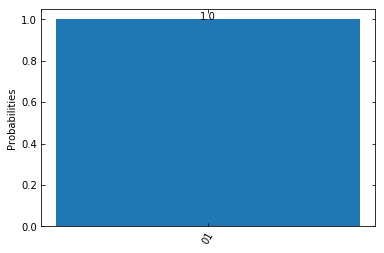

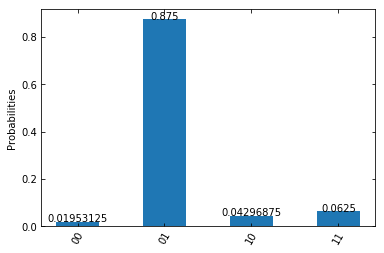

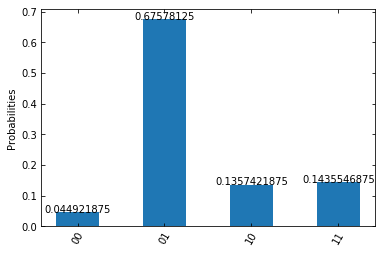

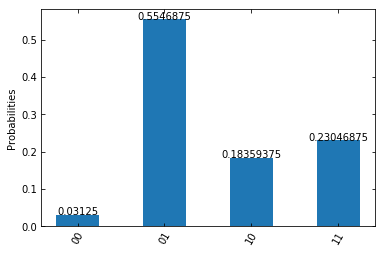

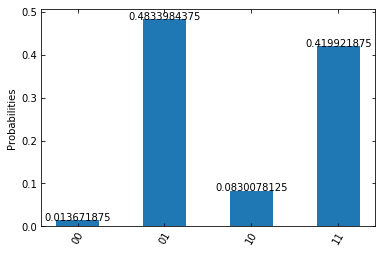

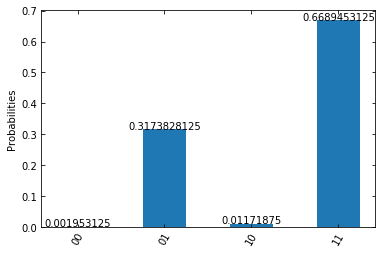

In [3]:
ns = 2
rep = 6

for re in range(0, rep):
    q = QuantumRegister(ns)
    c = ClassicalRegister(ns)
    qc = QuantumCircuit(q, c)
    qc.x(q[1])
    for _ in range(0, re):
        fdfp(qc, q[0], q[1], 1)
        
    for n in range(0, ns):
        qc.measure(q[n], c[n])
    r = execute(qc)
    plot_histogram(r)

## Example2: When there is no potential barrier

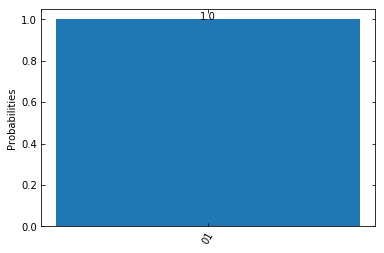

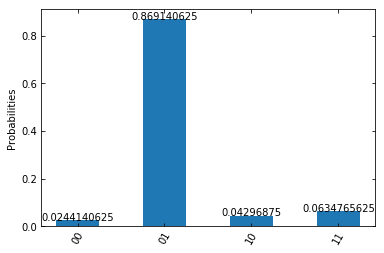

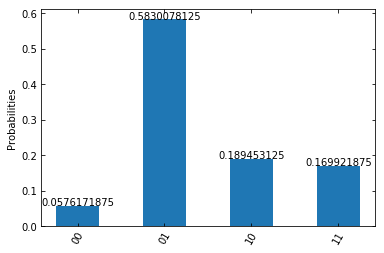

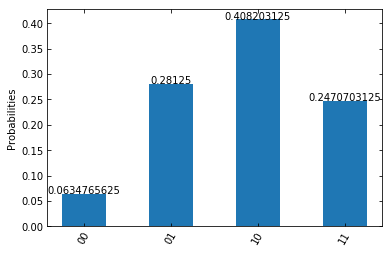

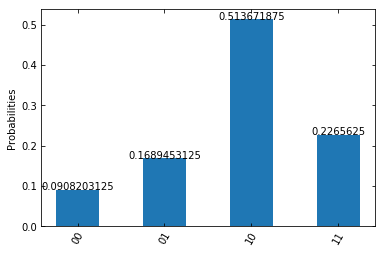

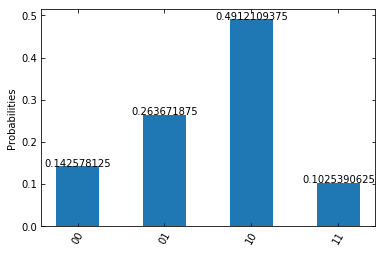

In [4]:
ns = 2
rep = 6

for re in range(0, rep):
    q = QuantumRegister(ns)
    c = ClassicalRegister(ns)
    qc = QuantumCircuit(q, c)
    qc.x(q[1])
    for _ in range(0, re):
        fdfp(qc, q[0], q[1], 0.0)
        
    for n in range(0, ns):
        qc.measure(q[n], c[n])
    r = execute(qc)
    plot_histogram(r)